In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt


C:\Users\Shant\AppData\Local\Programs\Python\Python310\lib\site-packages\google\api_core\_python_version_support.py:266: FutureWarning: You are using a Python version (3.10.11) which Google will stop supporting in new releases of google.api_core once it reaches its end of life (2026-10-04). Please upgrade to the latest Python version, or at least Python 3.11, to continue receiving updates for google.api_core past that date.
  warnings.warn(message, FutureWarning)


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

num_classes = 10


In [3]:
# Normalize
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat  = to_categorical(y_test, num_classes)


In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(32,32,3)),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])


C:\Users\Shant\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(
    x_train,
    y_train_cat,
    epochs=5,
    batch_size=64,
    validation_split=0.1,
    verbose=2
)


Epoch 1/5
704/704 - 8s - 12ms/step - accuracy: 0.4674 - loss: 1.4789 - val_accuracy: 0.5542 - val_loss: 1.2530
Epoch 2/5
704/704 - 7s - 10ms/step - accuracy: 0.6056 - loss: 1.1227 - val_accuracy: 0.6426 - val_loss: 1.0219
Epoch 3/5
704/704 - 7s - 10ms/step - accuracy: 0.6575 - loss: 0.9829 - val_accuracy: 0.6470 - val_loss: 0.9974
Epoch 4/5
704/704 - 7s - 10ms/step - accuracy: 0.6952 - loss: 0.8790 - val_accuracy: 0.6742 - val_loss: 0.9362
Epoch 5/5
704/704 - 7s - 10ms/step - accuracy: 0.7228 - loss: 0.8007 - val_accuracy: 0.6876 - val_loss: 0.9052


In [6]:
y_pred_prob = model.predict(x_test)

print(y_pred_prob.shape)   # (10000, 10)
print(y_test_cat.shape)    # (10000, 10)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
(10000, 10)
(10000, 10)


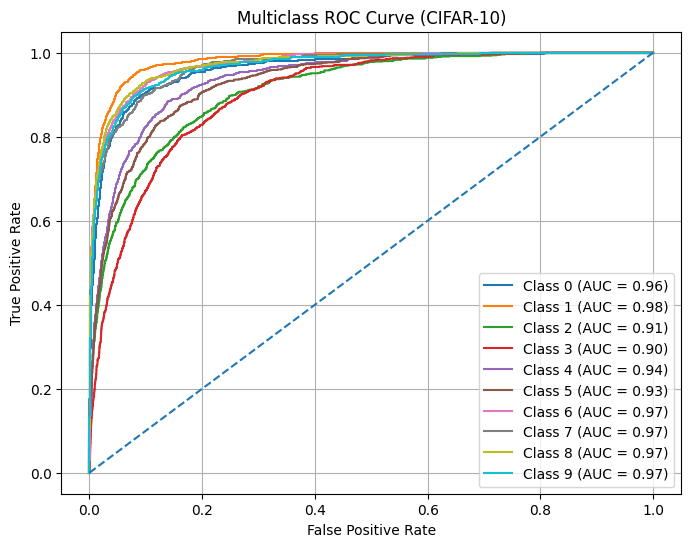

In [7]:
plt.figure(figsize=(8, 6))

for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_cat[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve (CIFAR-10)")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


In [9]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

num_classes = 10


In [10]:
inputs = tf.keras.Input(shape=(32, 32, 3))

# 🔥 Resize inside the model
x = layers.Resizing(75, 75)(inputs)

# Inception preprocessing
x = tf.keras.applications.inception_v3.preprocess_input(x)

base_model = InceptionV3(
    weights="imagenet",
    include_top=False,
    input_shape=(75, 75, 3)
)

base_model.trainable = False

x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model = models.Model(inputs, outputs)


In [11]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(
    x_train,
    y_train_cat,
    epochs=5,
    batch_size=64,
    validation_split=0.1,
    verbose=2
)


Epoch 1/5
704/704 - 82s - 117ms/step - accuracy: 0.5410 - loss: 1.3216 - val_accuracy: 0.6268 - val_loss: 1.0362
Epoch 2/5
704/704 - 78s - 111ms/step - accuracy: 0.6191 - loss: 1.0844 - val_accuracy: 0.6446 - val_loss: 1.0020
Epoch 3/5
704/704 - 80s - 113ms/step - accuracy: 0.6488 - loss: 1.0015 - val_accuracy: 0.6500 - val_loss: 0.9823
Epoch 4/5
704/704 - 81s - 116ms/step - accuracy: 0.6668 - loss: 0.9494 - val_accuracy: 0.6586 - val_loss: 0.9655
Epoch 5/5
704/704 - 83s - 118ms/step - accuracy: 0.6820 - loss: 0.9025 - val_accuracy: 0.6612 - val_loss: 0.9568


In [12]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resizing (Resizing)                  │ (None, 75, 75, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ true_divide (TrueDivide)             │ (None, 75, 75, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ subtract (Subtract)                  │ (None, 75, 75, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ inception_v3 (Functional)            │ (None, 1, 1, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,384,128 (89.20 MB)

 Trainable params: 527,114 (2.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

 Optimizer params: 1,054,230 (4.02 MB)

In [ ]:
y_pred_prob = model.predict(x_test)

print(y_pred_prob.shape)  # (10000, 10)
print(y_test_cat.shape)   # (10000, 10)


 24/313 ━━━━━━━━━━━━━━━━━━━━ 17s 62ms/step

In [ ]:
y_pred_prob = model.predict(x_test)

plt.figure(figsize=(8, 6))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_cat[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC={roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC – InceptionV3 (CIFAR-10)")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Convert probabilities to class labels
y_pred_labels = np.argmax(y_pred_prob, axis=1)
y_true_labels = y_test.flatten()


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

print(classification_report(
    y_true_labels,
    y_pred_labels,
    target_names=class_names,
    digits=4
))


In [ ]:
cm = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 7))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – InceptionV3 on CIFAR-10")
plt.tight_layout()
plt.show()
